**預計項目**

1. 104 年起火原因排行
2. 104 縱火縣市排名
3. 104 縱火縣市數量地圖
4. 104 縱火鄉鎮市區排名
5. 104 縱火鄉鎮市區數量地圖

--------------以上完成-------------

6. 104 縱火案件報案時間分佈


---

 2. 各縣市平均報案到抵達所花時間(box fig)
  
- 熱度圖
 1. 各縣市 x 原因
 2. 各縣市 x 報案時間
 3. 
  
- 地圖
 1. 縱火案件數
 2. 縱火案件數/火災案件數
 3. 縱火案件數/人口數
 4. 縱火案件數/人口密度
 5. 縱火案件數/公司行號數目



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import geopandas as gp
from IPython.display import Markdown, display
plt.rcParams['figure.dpi'] = 300

## 方便 markdown 寫作使用

In [2]:
def pandas_df_to_markdown_table(df):
    from IPython.display import Markdown, display
    fmt = ['---' for i in range(len(df.columns))]
    df_fmt = pd.DataFrame([fmt], columns=df.columns)
    df_formatted = pd.concat([df_fmt, df])
#     display(Markdown(df_formatted.to_csv to_csv(sep="|", index=False)))
    return df_formatted.to_csv(sep="|", index=False)

# 讀取台灣地圖資料
### 欄位
COUNTYCODE, COUNTYID, COUNTYNAME, TOWNCODE, TOWNENG, TOWNID, TOWNNAME, geometry

In [3]:
#全台灣村里界圖
taiwan_villages_shp = gp.read_file("../GeoPandas_GettingStart/town_shp/TOWN_MOI_1060525.shp")

In [4]:
#全台灣鄉鎮市區界圖
taiwan_town_shp = taiwan_villages_shp.dissolve('TOWNID', as_index=False)
taiwan_town_shp

,TOWNID,geometry,COUNTYCODE,COUNTYID,COUNTYNAME,TOWNCODE,TOWNENG,TOWNNAME
0,A01,"POLYGON ((121.5697062800001 25.07629222800006,...",63000,A,臺北市,63000010,Songshan District,松山區
1,A02,"POLYGON ((121.543841724 25.04490669700004, 121...",63000,A,臺北市,63000030,Daan District,大安區
2,A03,"POLYGON ((121.5134137450001 25.04939843500006,...",63000,A,臺北市,63000050,Zhongzheng District,中正區
3,A05,"POLYGON ((121.5052060700001 25.04949036400006,...",63000,A,臺北市,63000070,Wanhua District,萬華區
4,A09,"POLYGON ((121.5141047090001 25.07941577800005,...",63000,A,臺北市,63000060,Datong District,大同區
5,A10,"POLYGON ((121.5414663030001 25.09287088400004,...",63000,A,臺北市,63000040,Zhongshan District,中山區
6,A11,"POLYGON ((121.5972524900001 25.01438526800007,...",63000,A,臺北市,63000080,Wenshan District,文山區
7,A13,"POLYGON ((121.614250201 25.06451252200009, 121...",63000,A,臺北市,63000090,Nangang District,南港區
8,A14,"POLYGON ((121.5935900530001 25.11514551600004,...",63000,A,臺北市,63000100,Neihu District,內湖區
9,A15,"POLYGON ((121.580883371 25.19535329300004, 121...",63000,A,臺北市,63000110,Shilin District,士林區


# 火災事件資料前處理
1. 讀取、合併各縣市資料
2. "火災原因"關聯分組
3. "鄉鎮市區" column name 字串替換 & 缺字補充

In [84]:
# 1. 讀取、合併各縣市資料

# 建立各縣市火災檔案清單
list_xls_file = []
floder_path = '104年火災事件資料/'
for i in os.listdir(floder_path):
    list_xls_file.append(floder_path+i)
      
# 合併各縣市火災資料
df_taiwan_fire_event = pd.DataFrame()
for xls in list_xls_file:
    df = pd.read_excel(
                  xls, #list_xls_file[3],
                  skiprows=[0] #這份文件的 row1 不是 index，是文件名稱，所以要跳過
    )
    #print('{} 案件數量={}, '.format(df_taiwan_fire_event['縣市'].unique(), df_taiwan_fire_event.index.size), end='')
    df_taiwan_fire_event = pd.concat([df_taiwan_fire_event, df])

In [85]:
tab_str = pandas_df_to_markdown_table(
df_taiwan_fire_event.reset_index().drop(axis=1,labels='index').
                                groupby(by='縣市',as_index=False).nth(1)
)
print(tab_str.replace('\n','|\n|'))

縣市|鄉、鎮、市、區|街、路段|火災案件編號|報案時間 (月：日：時：分) |抵達時間 (月：日：時：分) |起火原因|死亡人數|受傷人數|
|---|---|---|---|---|---|---|---|---|
|高雄市|高雄市旗津區德利造船廠(CERIBU漁船)|－|315C20O2|03：20：141：59|03：20：15：106|施工不慎|0|0|
|新北市|淡水區|竿蓁二街|H15A08D1| 01:08:03:36| 01:08:03:42|電氣因素|0|0|
|臺北市|南港區|昆陽街|A15A04J1|2015-01-04 09:53:28.593000|2015-01-04 09:58:00|其他|0|0|
|桃園市|大溪區|瑞源里番仔寮|I15A03I1|01 : 03 : 08 : 59|01 : 03 : 09 : 13|燃燒雜草、垃圾|0|0|
|臺中市|中區|成功路|E15A11C1|01：11：02：31|01：11：02：53|縱火|0|0|
|臺南市|中西區|中山路|G15A01X1|01:01:23:32|01:01:23:36|電氣因素|0|0|
|宜蘭縣|南澳鄉|金洋路|T15A04R1|01:04:17:49|01:04:18:05|烘乾機作業不慎|0|0|
|新竹縣|北埔鄉|水祭村8鄰麻布樹排|J15A13I1|2016-01-13 08:18:00|2016-01-13 08:23:00|敬神祭祖|0|0|
|苗栗縣|頭份市|市場內|K15A20B1|01：20：02：01|01：20：02：04|縱火|0|0|
|彰化縣|芳苑鄉|芳漢路芳二段|M15A03P1|01:03:15:40|01:03:15:51|遺留火種|0|0|
|南投縣|魚池鄉|水秀街|N15A16G1|01:16:06:03 |01:16:06:21|瓦斯漏氣或爆炸|0|0|
|雲林縣|口湖鄉|埔南村|O15A02F1|01:02:05:30|01:02:05:39|電氣因素|0|0|
|嘉義縣|朴子市|四維路2段|P15A06M1|01：06：12：11|01：06：12：14|施工不慎|0|0|
|屏東縣|崁頂鄉|復興路|S15A01N1|01:01:14:00|01:01:14:08|縱火|0|0|
|臺東縣|臺東市|平等街|V15A25J

In [6]:
# 2. "火災原因"關聯分組

# 火災事件關聯分組表
dict_fire_event = {
    '自殺':['自殺','自焚'],
    '蠟燭':['蠟燭','燈燭'],
    '縱火':['縱火','疑似縱火','人為縱火'],
    '瓦斯':['瓦斯','瓦斯外洩','瓦斯漏氣或爆炸','洩漏液化石油氣','洩漏液化瓦斯','瓦斯漏氣爆炸','瓦斯灌充填打火機不慎'],
    '機械設備':['機械設備','機械故障'],
    '電氣因素':['電氣因素','電氣因素(不含車輛)'],
    '乾燥作業':['乾燥作業','烘乾機作業不慎','烤火'],
    '敬神祭祖':['敬神祭祖','敬神、祭祖','敬神','祭祖'],
    '爐火烹調':['爐火烹調','爐火不慎','爐火烹調油鍋起火','爐火烹調乾燒'],
    '車輛因素':['車輛因素','車輛電氣因素','車輛機械因素','引擎排煙管高溫','車輛人為疏忽','車輛電氣系統','車輛燃料系統',],
    '燃燒廢棄物':['燃燒廢棄物','燃燒雜草、垃圾','自清','燒廢料','燃燒木材不慎','整地','引燃汽油','引燃枯草'],
    '燃放爆竹煙火':['燃放爆竹','燃放爆竹煙火','施放爆竹煙火'],
    '易燃液體接觸火源':['易燃液體接觸火源','易燃品自燃','化學物品','柴油洩漏接觸熱源','絕緣油接觸高溫','易燃液體'],
    '其他或不明':['其他或不明','其他','其它','原因不明','不明']
}

print("原先所有類別數量 = {}".format(len(df_taiwan_fire_event['起火原因'].unique())))

# 關聯分組字串替換
for key in dict_fire_event:
    df_taiwan_fire_event['起火原因'].replace(
        to_replace = dict_fire_event[key],
        value = key, inplace=True)

df_fire_cause_count = df_taiwan_fire_event.groupby(by = ['起火原因'], squeeze = True).count()
df_fire_cause_count.iloc[:,0:1].sort_values(
                    by = df_fire_cause_count.columns[0],
                    ascending = False)
print("關聯分組類別數量 = {}".format(len(df_fire_cause_count.index.unique())))
print(df_fire_cause_count.index.values)

原先所有類別數量 = 62
關聯分組類別數量 = 25
['乾燥作業' '交通事故' '其他或不明' '天然災害' '敬神掃墓祭祖' '敬神祭祖' '施工不慎' '易燃液體接觸火源' '機械設備'
 '汙泥過熱' '燃放爆竹煙火' '燃燒廢棄物' '爐火烹調' '玩火' '瓦斯' '縱火' '自殺' '菸蒂' '蠟燭' '車輛因素' '遺留火種'
 '除蜂不慎' '電暖器引燃可燃物' '電氣因素' '點蚊香不慎引火']


In [7]:
# 3. "鄉鎮市區" column name 字串替換 & 缺字補充

#'鄉、鎮、市、區'不能 query
df_taiwan_fire_event.rename_axis({'鄉、鎮、市、區':'鄉鎮市區'}, axis=1, inplace=True)

dict_TOWNNAME = {
    '中山區':['中山區','中山'],
    '七堵區':['七堵區','七堵'],
    '中正區':['中正區','中正'],
    '仁愛區':['仁愛區','仁愛'],
    '信義區':['信義區','信義'],
    '安樂區':['安樂區','安樂'],
    '暖暖區':['暖暖區','暖暖'],
    '臺西鄉':['臺西鄉','臺西','台西鄉','台西'],
}

for key in dict_TOWNNAME:
    df_taiwan_fire_event['鄉鎮市區'].replace(
            to_replace = dict_TOWNNAME[key],
            value = key, inplace=True)

In [8]:
# df_taiwan_fire_event.query('鄉鎮市區=="大甲區"')
# taiwan_town_shp.query('TOWNNAME=="大甲區"')
print("鄉鎮市區總數 = {}".format(taiwan_town_shp.index.size))

鄉鎮市區總數 = 368


In [9]:
# 求兩個資料集的差異
set(
    df_taiwan_fire_event['鄉鎮市區'].unique()
).difference(set(taiwan_town_shp['TOWNNAME']))

{'台南市南區鯤鯓湖南側水道(CTR-CI0031舢舨)',
 '高雄市前鎮漁港(益大68號)',
 '高雄市旗津區德利造船廠(CERIBU漁船)',
 '高雄港121號碼頭(華維1號貨輪)',
 '高雄港32號碼頭(編號10-8號堆高機)',
 '高雄港78號碼頭(編號601號堆高機)'}

## 資前處理和檢查完成

In [10]:
# df_taiwan_fire_event.sort_values(by='受傷人數', ascending=False)
# taiwan_town_shp[['COUNTYNAME','TOWNNAME']]
# pd.Series(index = df_taiwan_fire_event['起火原因'].unique(),
#           data  = df_taiwan_fire_event.query('縣市=="臺中市" and 鄉鎮市區=="潭子區"')["起火原因"].value_counts()).fillna(0)

In [11]:
# df_raw.query('"潭子"鄉鎮市區')
# df_taichug_region1 = df_taiwan_fire_event.query('"大雅區"==鄉鎮市區 or "神岡區"==鄉鎮市區 or "潭子區"==鄉鎮市區 or "豐原區"==鄉鎮市區')

## 全台火災原因排名表

In [12]:
df_fire_event_rank_of_TW = (df_taiwan_fire_event
        .groupby(by=['起火原因']).count().iloc[:,[0]] #計算各原因事件數目
        .rename(columns={'縣市':'數量'}) #體換成合理的 column name
        .sort_values(by=['數量'],ascending=False) #排序
        .T #轉置
    )
display(df_fire_event_rank_of_TW)
# 產生寫文章用的 MD table
pandas_df_to_markdown_table(df_fire_event_rank_of_TW)

起火原因,電氣因素,縱火,其他或不明,菸蒂,遺留火種,爐火烹調,車輛因素,施工不慎,燃燒廢棄物,敬神祭祖,...,交通事故,易燃液體接觸火源,玩火,敬神掃墓祭祖,乾燥作業,汙泥過熱,除蜂不慎,電暖器引燃可燃物,天然災害,點蚊香不慎引火
數量,576,270,164,148,104,72,46,37,31,31,...,18,15,14,14,2,1,1,1,1,1


'電氣因素|縱火|其他或不明|菸蒂|遺留火種|爐火烹調|車輛因素|施工不慎|燃燒廢棄物|敬神祭祖|瓦斯|機械設備|燃放爆竹煙火|自殺|蠟燭|交通事故|易燃液體接觸火源|玩火|敬神掃墓祭祖|乾燥作業|汙泥過熱|除蜂不慎|電暖器引燃可燃物|天然災害|點蚊香不慎引火\n---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---\n576|270|164|148|104|72|46|37|31|31|29|27|26|24|19|18|15|14|14|2|1|1|1|1|1\n'

## （各縣市 X 各種起火原因）數量表

In [13]:
df_town_fire_cause = pd.crosstab(index=[df_taiwan_fire_event['縣市'],
                                        df_taiwan_fire_event['鄉鎮市區']
                                       ],
                                columns=df_taiwan_fire_event["起火原因"])
df_town_fire_cause

起火原因                       乾燥作業  交通事故  其他或不明  天然災害  敬神掃墓祭祖  敬神祭祖  施工不慎  \
縣市  鄉鎮市區                                                                 
南投縣 中寮鄉                       0     1      0     0       0     1     0   
    仁愛鄉                       1     0      1     0       0     0     0   
    信義鄉                       0     0      1     0       0     2     0   
    南投市                       0     0      2     0       0     3     1   
    名間鄉                       0     0      0     0       0     0     0   
    國姓鄉                       0     0      0     0       0     0     0   
    埔里鎮                       0     2      0     0       0     0     0   
    水里鄉                       0     1      0     0       0     2     0   
    竹山鎮                       0     0      1     0       0     0     0   
    草屯鎮                       0     1      0     0       0     2     0   
    集集鎮                       0     0      0     0       0     0     0   
    魚池鄉                       0     0      1     0       0     0     0   
    鹿谷鄉                       0     0      0     0       0     0     0   
嘉義市 東區                        0     0      1     0       0     0     0   
    西區                        0     0      2     0       0     0     0   
嘉義縣 中埔鄉                       0     0      0     0       0     0     0   
    大林鎮                       0     0      1     0       0     0     0   
    太保市                       0     0      1     0       0     0     0   
    布袋鎮                       0     0      0     0       0     0     0   
    新港鄉                       0     0      0     0       0     0     0   
    朴子市                       0     0      0     0       0     0     1   
    東石鄉                       0     0      0     0       0     0     0   
    梅山鄉                       0     0      0     0       0     0     0   
    民雄鄉                       0     0      1     0       0     0     0   
    水上鄉                       0     0      2     0       0     1     0   
    溪口鄉                       0     0      0     0       0     0     0   
    番路鄉                       0     0      0     0       0     0     0   
    竹崎鄉                       0     0      0     0       0     0     0   
基隆市 七堵區                       0     0      1     0       0     0     0   
    中山區                       0     0      2     0       0     0     0   
...                         ...   ...    ...   ...     ...   ...   ...   
高雄市 仁武區                       0     0      0     0       0     0     0   
    內門區                       0     0      0     0       0     0     0   
    前金區                       0     0      0     0       0     0     0   
    前鎮區                       0     0      0     0       0     0     0   
    大寮區                       0     0      0     0       0     0     0   
    大樹區                       0     0      0     0       0     0     0   
    大社區                       0     0      0     0       0     0     0   
    小港區                       0     0      0     0       0     0     1   
    岡山區                       0     0      0     0       0     0     0   
    新興區                       0     0      0     0       0     0     0   
    旗山區                       0     0      0     0       0     0     0   
    林園區                       0     0      0     0       0     0     0   
    梓官區                       0     0      0     0       0     0     0   
    楠梓區                       0     0      0     0       0     0     0   
    永安區                       0     0      0     0       0     0     0   
    湖內區                       0     0      0     0       0     0     0   
    燕巢區                       0     0      0     0       0     0     0   
    美濃區                       0     0      0     0       0     0     0   
    苓雅區                       0     0      0     0       0     0     0   
    茄萣區                       0     0      0     0       0     0     0   
    路竹區                       0     0      0     0       0     0     0   
    

## 各縣市縱火排名表

In [14]:
# 地區縱火排名表
df_Arson_rank = (df_town_fire_cause.groupby(by=['縣市','鄉鎮市區']).sum()[['縱火']]
                                   .sort_values(by=['縱火'], ascending=False)
                )
# df_Arson_rank['縱火'].values
display(df_Arson_rank.groupby(by=['縣市']).sum().sort_values(by=['縱火'], ascending=False).T)
display(df_Arson_rank.sort_values(by=['縱火'], ascending=False)[0:20].T)

縣市,桃園市,屏東縣,臺南市,臺中市,彰化縣,高雄市,臺北市,嘉義縣,雲林縣,苗栗縣,...,南投縣,宜蘭縣,新竹縣,基隆市,澎湖縣,新竹市,嘉義市,金門縣,臺中港,連江縣
起火原因,,,,,,,,,,,,,,,,,,,,,
縱火,48,38,24,24,17,16,14,13,12,11,...,6,6,5,3,3,2,1,1,0,0


縣市   桃園市         臺東縣 屏東縣 雲林縣 桃園市 臺南市 桃園市 臺北市 彰化縣     苗栗縣 臺南市 屏東縣     臺南市 臺中市  \
鄉鎮市區 中壢區 蘆竹區 平鎮區 臺東市 屏東市 虎尾鎮 桃園區 關廟區 觀音區 信義區 秀水鄉 鹿港鎮 苗栗市 永康區 枋寮鄉 琉球鄉 新市區 太平區   
起火原因                                                                           
縱火     9   8   6   6   6   5   5   5   5   4   4   4   4   4   4   3   3   3   

縣市            
鄉鎮市區 大甲區 沙鹿區  
起火原因          
縱火     3   3

In [15]:
print(pandas_df_to_markdown_table(df_Arson_rank.sort_values(by=['縱火'], ascending=False)[0:100].T))

桃園市|桃園市|桃園市|臺東縣|屏東縣|雲林縣|桃園市|臺南市|桃園市|臺北市|彰化縣|彰化縣|苗栗縣|臺南市|屏東縣|屏東縣|臺南市|臺中市|臺中市|臺中市|桃園市|屏東縣|花蓮縣|桃園市|臺南市|臺北市|桃園市|屏東縣|花蓮縣|臺中市|臺中市|屏東縣|花蓮縣|嘉義縣|嘉義縣|嘉義縣|臺南市|高雄市|嘉義縣|南投縣|嘉義縣|高雄市|桃園市|南投縣|桃園市|彰化縣|桃園市|高雄市|高雄市|屏東縣|屏東縣|屏東縣|臺北市|雲林縣|彰化縣|苗栗縣|臺中市|臺北市|新北市|臺南市|新竹縣|新竹縣|臺南市|高雄市|屏東縣|宜蘭縣|屏東縣|屏東縣|彰化縣|臺南市|高雄市|彰化縣|彰化縣|屏東縣|基隆市|宜蘭縣|臺北市|宜蘭縣|雲林縣|基隆市|臺北市|高雄市|臺南市|屏東縣|雲林縣|新北市|宜蘭縣|彰化縣|雲林縣|彰化縣|宜蘭縣|宜蘭縣|基隆市|新北市|屏東縣|屏東縣|屏東縣|屏東縣|屏東縣|臺南市
中壢區|蘆竹區|平鎮區|臺東市|屏東市|虎尾鎮|桃園區|關廟區|觀音區|信義區|秀水鄉|鹿港鎮|苗栗市|永康區|枋寮鄉|琉球鄉|新市區|太平區|大甲區|沙鹿區|龍潭區|長治鄉|吉安鄉|八德區|七股區|大安區|楊梅區|內埔鄉|秀林鄉|北屯區|清水區|恆春鎮|萬榮鄉|布袋鎮|朴子市|水上鄉|北區|岡山區|大林鎮|水里鄉|竹崎鄉|大樹區|龜山區|埔里鎮|新屋區|彰化市|大溪區|前鎮區|仁武區|東港鎮|春日鄉|新埤鄉|萬華區|西螺鎮|埔心鄉|頭份市|東區|內湖區|板橋區|東區|湖口鄉|關西鎮|下營區|三民區|萬丹鄉|宜蘭市|麟洛鄉|潮州鎮|二林鎮|仁德區|內門區|溪湖鎮|員林市|滿州鄉|七堵區|冬山鄉|松山區|三星鄉|莿桐鄉|安樂區|文山區|梓官區|南化區|林邊鄉|崙背鄉|林口區|礁溪鄉|芬園鄉|東勢鄉|芳苑鄉|蘇澳鎮|頭城鎮|仁愛區|中和區|枋山鄉|九如鄉|新園鄉|來義鄉|崁頂鄉|南區
---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|

In [16]:
# 計算百分比
(df_Arson_rank.groupby(by=['縣市']).sum()
 .sort_values(by=['縱火'], ascending=False)
 .apply(lambda x: 100*x/float(x.sum())).T
)

縣市,桃園市,屏東縣,臺南市,臺中市,彰化縣,高雄市,臺北市,嘉義縣,雲林縣,苗栗縣,...,南投縣,宜蘭縣,新竹縣,基隆市,澎湖縣,新竹市,嘉義市,金門縣,臺中港,連江縣
起火原因,,,,,,,,,,,,,,,,,,,,,
縱火,17.777778,14.074074,8.888889,8.888889,6.296296,5.925926,5.185185,4.814815,4.444444,4.074074,...,2.222222,2.222222,1.851852,1.111111,1.111111,0.740741,0.37037,0.37037,0.0,0.0


In [17]:
# df_Arson_rank[['']]

## 各[ 縣市, 鄉鎮市區 ] 縱火數量地圖

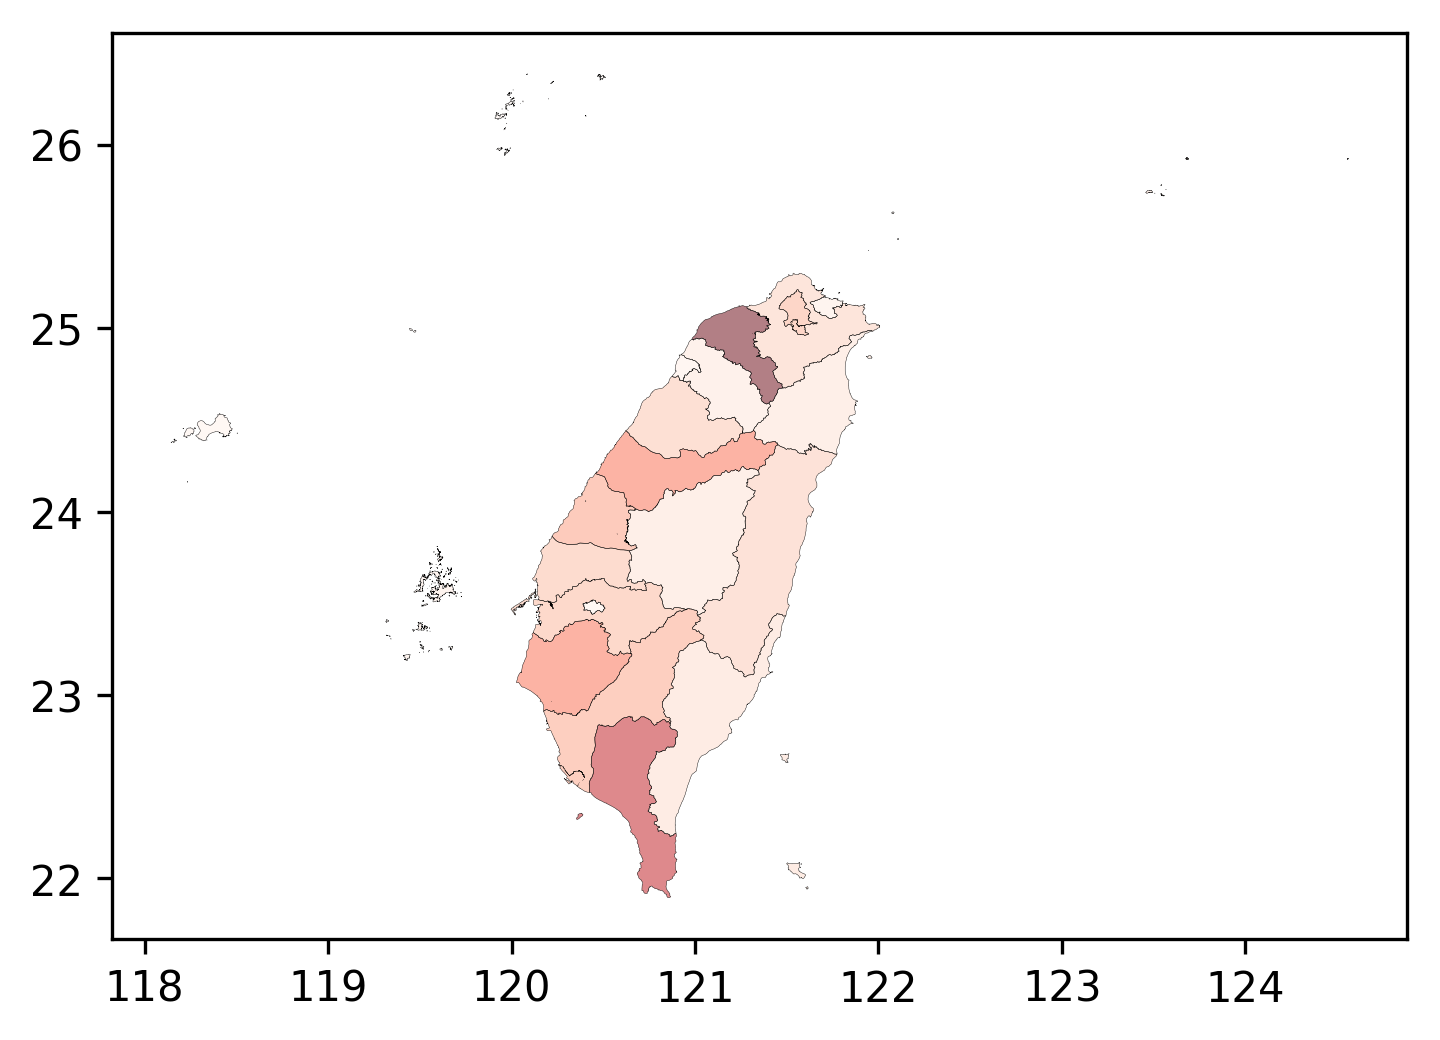

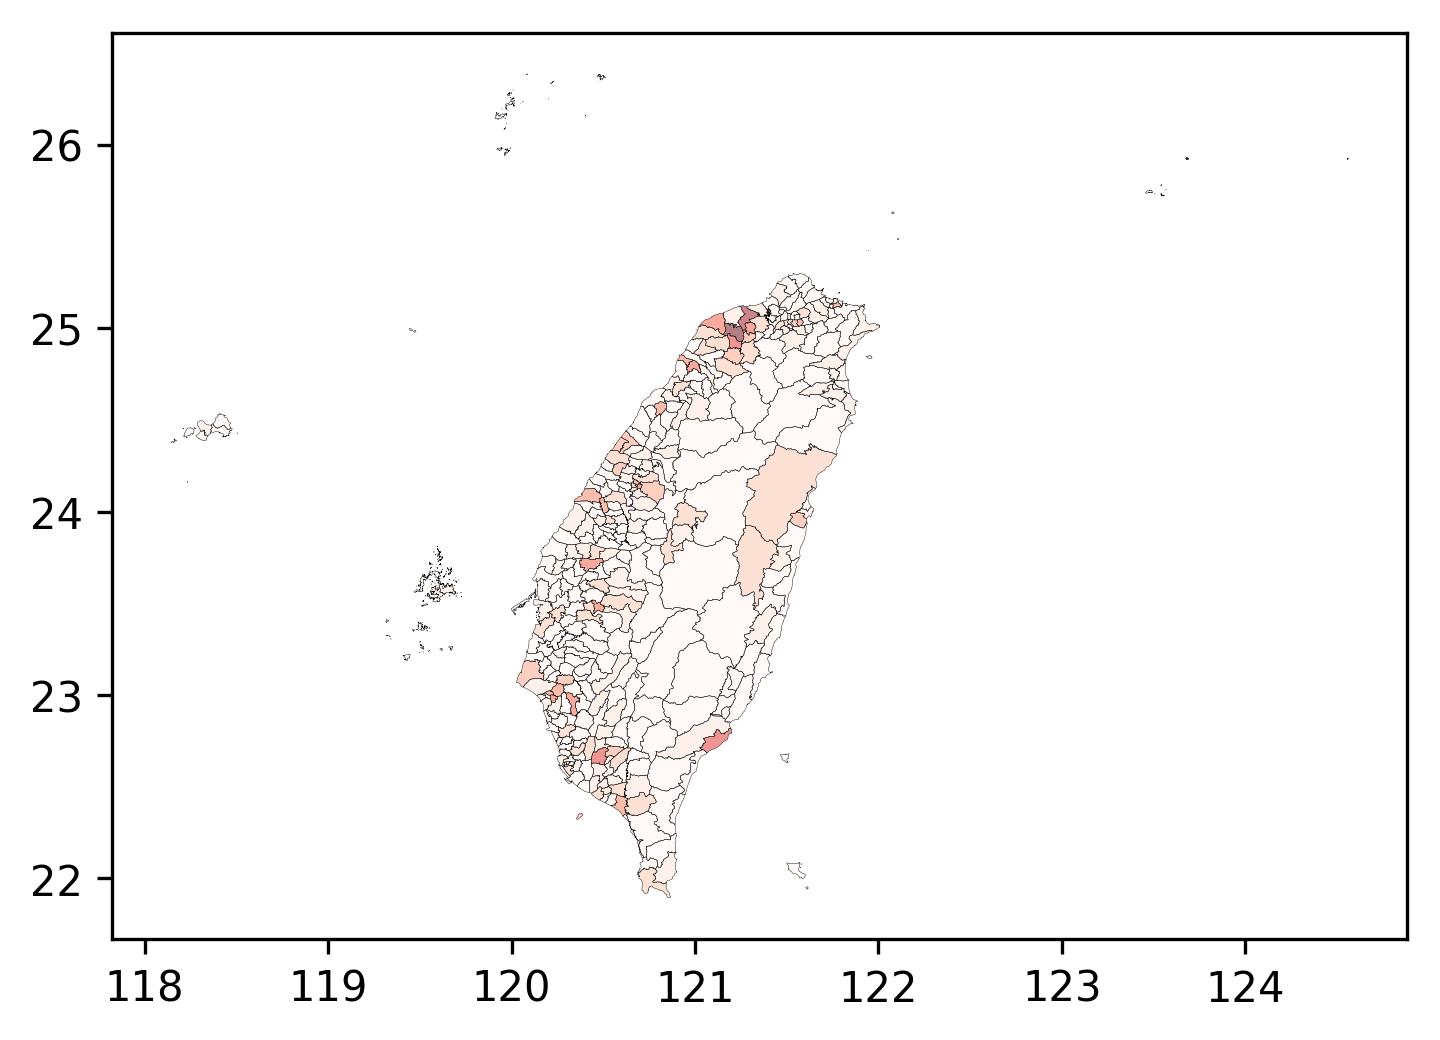

In [18]:
list_scope = [['COUNTYNAME', '縣市'], ['TOWNNAME', '鄉鎮市區']]
ax = []

for scope in list_scope:
    ax.append(
        taiwan_town_shp.
            dissolve(scope[0], as_index=False)[[scope[0],'geometry']]
                .merge(
                    right = df_Arson_rank.groupby(by = scope[1]).sum(),
                    left_on = [scope[0]],
                    right_index = True,
                    how = 'left')
                .plot(
                    linewidth = 0.1,
                    cmap = plt.cm.Reds, #指定顏色
                    column = '縱火', #指定從自身的這個 column 讀取顏色深度,
#                     legend = True, k = 10, scheme = 'Quantiles'
                    )
    )
plt.show()

## 縱火案件報案時間分佈

In [19]:
df_taiwan_fire_event.columns

Index(['縣市', '鄉鎮市區', '街、路段', '火災案件編號', '報案時間 (月：日：時：分) ', '抵達時間 (月：日：時：分) ',
       '起火原因', '死亡人數', '受傷人數'],
      dtype='object')

In [75]:
# df_taiwan_fire_event[['縣市','報案時間 (月：日：時：分) ']]
df_taiwan_fire_event.iloc[[1,9],:]

,縣市,鄉鎮市區,街、路段,火災案件編號,報案時間 (月：日：時：分),抵達時間 (月：日：時：分),起火原因,死亡人數,受傷人數
1,高雄市,高雄市旗津區德利造船廠(CERIBU漁船),－,315C20O2,03：20：141：59,03：20：15：106,施工不慎,0,0
3,新北市,土城區,金城路三段,H15A10P1,01:10:15:11,01:10:15:18,其他或不明,0,0
